<a href="https://colab.research.google.com/github/mjairamchandr21/Data-Driven-Salary-Forecasting/blob/main/Data_Driven_Salary_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file you downloaded
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("sample_salary_dataset.csv")
df.head()


Saving sample_salary_dataset.csv to sample_salary_dataset.csv


,Title,Location,Function,Industry,Employment.Type,Description,Salary
0,Software Engineer,New York,Engineering,Tech,Full-time,Develop software applications and systems,85000
1,Data Scientist,San Francisco,Data,Tech,Full-time,Analyze data to derive insights and build models,120000
2,Web Developer,Los Angeles,Engineering,Media,Contract,Create and maintain websites and web apps,70000
3,ML Engineer,Austin,AI,Finance,Full-time,Design machine learning systems and pipelines,135000
4,System Analyst,Chicago,IT,Consulting,Part-time,Analyze and design system solutions,95000


In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Encode categorical features
df_encoded = pd.get_dummies(df.drop('Salary', axis=1))

# Define features (X) and target (y)
X = df_encoded
y = df['Salary']

# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Missing values:
 Title              0
Location           0
Function           0
Industry           0
Employment.Type    0
Description        0
Salary             0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 26150.0
Root Mean Squared Error (RMSE): 26150.0
R^2 Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


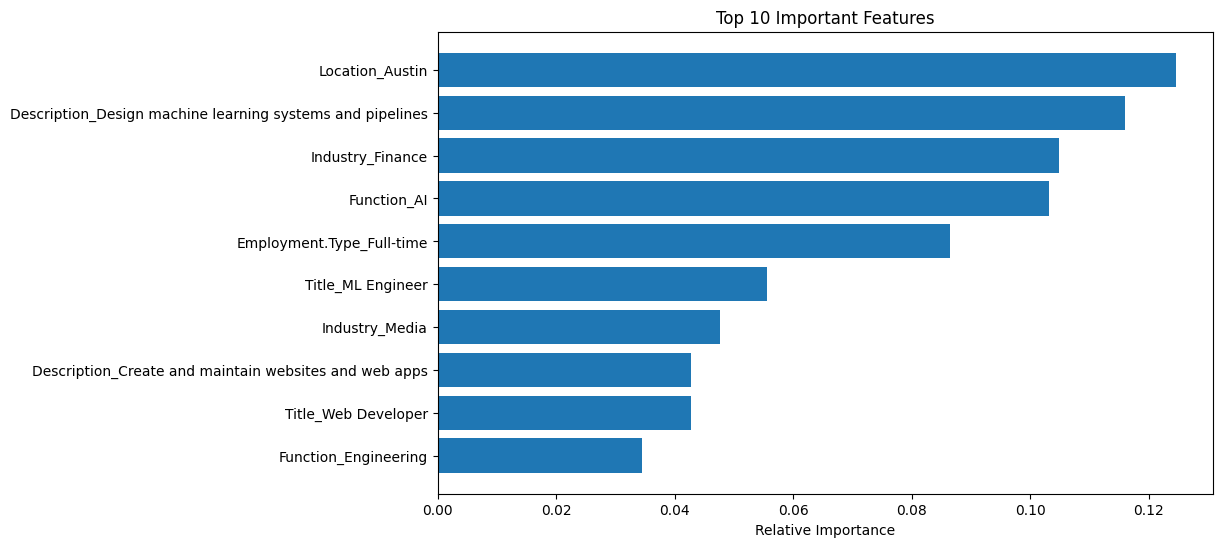

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = model.feature_importances_
features = df_encoded.columns
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()
